In [1]:
import numpy as np

In [2]:
tau_red = np.load("../nl-fgpa/tau_red_test_320Mpc.npy")
tau_real = np.load("../nl-fgpa/tau_real_test_320Mpc.npy")


Populating the interactive namespace from numpy and matplotlib


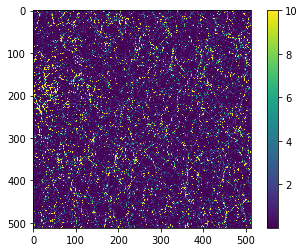

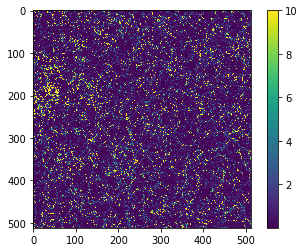

In [3]:
%pylab inline
from nbodykit.source.mesh import BigFileMesh

import nbodykit

imshow(tau_red[0],vmax=10)
colorbar()
show()
imshow(tau_real[0],vmax=10)
colorbar()
show()

In [4]:
flux_raw = np.exp(-tau_red)
flux_red = flux_raw/flux_raw.mean()-1

flux_raw = np.exp(-tau_real)
flux_real = flux_raw/flux_raw.mean()-1

In [5]:
np.save("flux_red",flux_red)

In [6]:
from scipy import ndimage

In [7]:
#flux_red = ndimage.zoom(flux_red,128/512)
#print("red done...")
#flux_real = ndimage.zoom(flux_real,128/512)

In [8]:
from nbodykit.lab import UniformCatalog, FFTPower
#calculate fluxes, do things in flux space
pm_red = nbodykit.source.mesh.array.ArrayMesh(flux_red, 320)
pm_real = nbodykit.source.mesh.array.ArrayMesh(flux_real, 320)

In [9]:
r_red = FFTPower(pm_red, mode='1d', dk=0.10, kmin=0.0001)
r_real = FFTPower(pm_real, mode='1d', dk=0.10, kmin=0.0001)

/global/homes/b/bhorowit/.conda/envs/nersc-all2/lib/python3.6/site-packages/pmesh/pm.py:258: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.value.__getitem__(index)


In [10]:
Pk_red = r_red.power
Pk_real = r_real.power

Text(0,0.5,'$kP(k)$ [$h^{-3}\\mathrm{Mpc}^3$]')

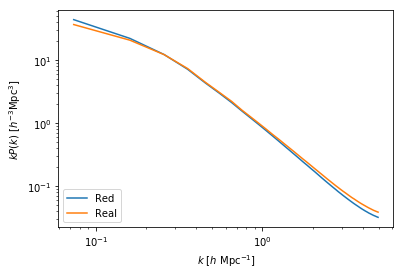

In [11]:
labels = ["Red","Real"]
for i,Pk in enumerate([Pk_red,Pk_real]):
    plt.loglog(Pk['k'], Pk['power'].real,label = labels[i])
plt.legend(loc=3)

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$kP(k)$ [$h^{-3}\mathrm{Mpc}^3$]")

In [12]:
#np.save("p1d_red",np.array([Pk_red['k'], Pk_red['power'].real

In [13]:
tf = np.load("./test_fields/test_field_red_1d_0.npy")/2
pm_test = nbodykit.source.mesh.array.ArrayMesh(tf, 320)

r_test = FFTPower(pm_test, mode='1d', dk=0.10, kmin=0.0001)
Pk_test = r_test.power
labels = ["Red","test"]
for i,Pk in enumerate([Pk_red,Pk_test]):
    plt.loglog(Pk['k'], Pk['power'].real,label = labels[i])
plt.legend(loc=3)

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k)$ [$h^{-3}\mathrm{Mpc}^3$]")

plt.show()

plt.semilogx(Pk['k'], Pk_red['power'].real/Pk_test['power'].real,label = labels[i])

FileNotFoundError: [Errno 2] No such file or directory: './test_fields/test_field_red_1d_0.npy'

In [ ]:
imshow(tf[0])
colorbar()
show()
imshow(flux_red[0])
colorbar()


In [13]:
r_red_2d = FFTPower(pm_red, mode='2d', dk=0.1, kmin=0.0001, Nmu=8, los=[0,0,1])
Pkmu_red = r_red_2d.power


r_real_2d = FFTPower(pm_real, mode='2d', dk=0.1, kmin=0.0001, Nmu=8, los=[0,0,1])
Pkmu_real = r_real_2d.power


/global/homes/b/bhorowit/.conda/envs/nersc-all2/lib/python3.6/site-packages/pmesh/pm.py:258: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.value.__getitem__(index)


IndexError: list index out of range

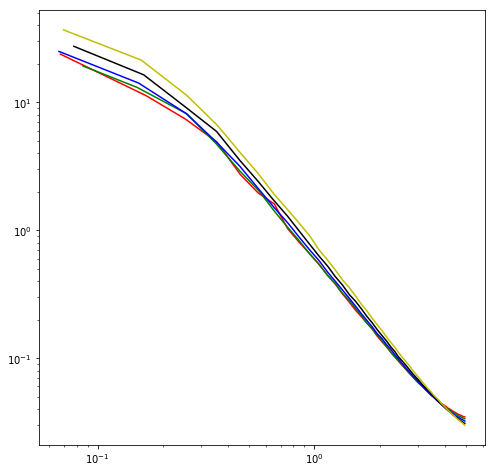

In [14]:
plt.figure(figsize=(8,8))

# plot each mu bin
lines = ["r","g","b","k","y"]
for i in range(Pkmu_red.shape[1]):
    Pk = Pkmu_red[:,i] # select the ith mu bin
    label = r'$\mu$=%.1f' % (Pkmu_red.coords['mu'][i])
    plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'],lines[i], label=label)

# format the axes
plt.legend(loc=0, ncol=2)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k, \mu)$ [$h^{-3}\mathrm{Mpc}^3$]")

#plot reconstructed as little dots on top
for i in range(Pkmu_real.shape[1]):
    Pk = Pkmu_real[:,i] # select the ith mu bin
    label = r'$\mu$=%.1f' % (Pkmu_real.coords['mu'][i])
    plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'],lines[i]+":", label=label)

#plt.ylim([10**6,10**10])
    


In [15]:
output_all = []
for i in range(0,4):
    output_all.append([Pkmu_red[:,i]["k"],Pkmu_red[:,i]["mu"],Pkmu_red[:,i]["power"].real])

In [16]:
Pkmu_red[:,:]["mu"][0]

array([0.        , 0.22996528, 0.29785106, 0.43607598, 0.5630743 ,
       0.68379595, 0.82679426, 0.93862388])

In [ ]:
flux_red_rec = np.load("./test_field_red.npy")*1.3


In [17]:
from nbodykit.lab import UniformCatalog, FFTPower
#calculate fluxes, do things in flux space
pm_red = nbodykit.source.mesh.array.ArrayMesh(flux_red, 320)
pm_real = nbodykit.source.mesh.array.ArrayMesh(flux_red_rec, 320)

NameError: name 'flux_red_rec' is not defined

In [ ]:
r_red = FFTPower(pm_red, mode='1d', dk=0.40, kmin=0.01)
r_real = FFTPower(pm_real, mode='1d', dk=0.40, kmin=0.01)
dk=0.10
kmin=0.0001

In [ ]:
Pk_red = r_red.power
Pk_real = r_real.power

Text(0,0.5,'$kP(k)$ [$h^{-3}\\mathrm{Mpc}^3$]')

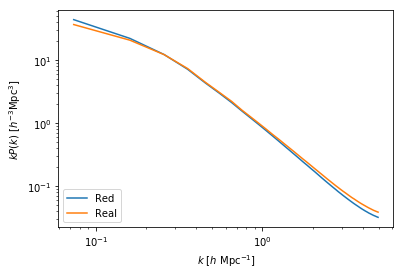

In [14]:
labels = ["Red","Real"]
for i,Pk in enumerate([Pk_red,Pk_real]):
    plt.loglog(Pk['k'], Pk['power'].real,label = labels[i])
plt.legend(loc=3)

# format the axes
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$kP(k)$ [$h^{-3}\mathrm{Mpc}^3$]")

In [22]:
r_red_2d = FFTPower(pm_red, mode='2d', dk=0.2, kmin=0.0001, Nmu=4, los=[0,0,1])
Pkmu_red = r_red_2d.power


r_real_2d = FFTPower(pm_real, mode='2d', dk=0.2, kmin=0.0001, Nmu=4, los=[0,0,1])
Pkmu_real = r_real_2d.power


/global/homes/b/bhorowit/.conda/envs/nersc-all2/lib/python3.6/site-packages/pmesh/pm.py:258: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return self.value.__getitem__(index)


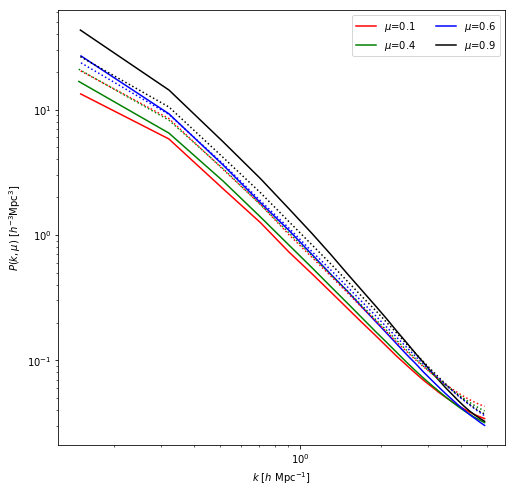

In [16]:
plt.figure(figsize=(8,8))

# plot each mu bin
lines = ["r","g","b","k","y","b","k","y"]
for i in range(Pkmu_red.shape[1]):
    Pk = Pkmu_red[:,i] # select the ith mu bin
    label = r'$\mu$=%.1f' % (Pkmu_red.coords['mu'][i])
    plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'],lines[i], label=label)

# format the axes
plt.legend(loc=0, ncol=2)
plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
plt.ylabel(r"$P(k, \mu)$ [$h^{-3}\mathrm{Mpc}^3$]")

#plot reconstructed as little dots on top
for i in range(Pkmu_real.shape[1]):
    Pk = Pkmu_real[:,i] # select the ith mu bin
    label = r'$\mu$=%.1f' % (Pkmu_real.coords['mu'][i])
    plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'],lines[i]+":", label=label)

#plt.ylim([10**6,10**10])
    


In [18]:
for ij in range(0,1):
    print(ij)
   # flux_red_rec = np.load("./test_fields/test_field_red2_"+str(ij)+".npy")*512**3/320**3/2
   # flux_red_rec = np.load("./test_fields/test_field_red3b_"+str(ij)+".npy")/4#*128**3/320**3
   # flux_red_rec = np.load("./test_field_x.npy")/4#*128**3/320**3
    #flux_red_rec = np.load("./test_ix0.npy")
    flux_red_rec = np.load("../test_field_x.npy")#/4#*2
    # flux_red_rec = np.load("./test_field_x.npy")*128**3/320**3
    pm_test= nbodykit.source.mesh.array.ArrayMesh(flux_red_rec, 320)

    r_real_2d = FFTPower(pm_test, mode='2d', dk=0.1, kmin=0.001, Nmu=4, los=[0,0,1])
    Pkmu_real = r_real_2d.power

    plt.figure(figsize=(8,8))

    # plot each mu bin
    lines = ["r","g","b","k","y","b","k","y"]
    for i in range(Pkmu_red.shape[1]):
        Pk = Pkmu_red[:,i] # select the ith mu bin
        label = r'$\mu$=%.1f' % (Pkmu_red.coords['mu'][i])
        plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'],lines[i], label=label)
    
    # format the axes
    plt.legend(loc=0, ncol=2)
    plt.xlabel(r"$k$ [$h \ \mathrm{Mpc}^{-1}$]")
    plt.ylabel(r"$P(k, \mu)$ [$h^{-3}\mathrm{Mpc}^3$]")
    
    #plot reconstructed as little dots on top
    for i in range(Pkmu_real.shape[1]):
        Pk = Pkmu_real[:,i] # select the ith mu bin
        label = r'$\mu$=%.1f' % (Pkmu_real.coords['mu'][i])
        plt.loglog(Pk['k'], Pk['power'].real - Pk.attrs['shotnoise'],lines[i]+":", label=label)
    plt.show()

    
    #plot reconstructed as little dots on top
    for i in range(Pkmu_real.shape[1]):
        Pk = Pkmu_real[:,i] # select the ith mu bin
        Pk_r = Pkmu_red[:,i] # select the ith mu bin

        label = r'$\mu$=%.1f' % (Pkmu_real.coords['mu'][i])
        plt.semilogx(Pk['k'], Pk['power'].real/Pk_r['power'].real,lines[i]+":", label=label)
    plt.show()

0


FileNotFoundError: [Errno 2] No such file or directory: './test_field_x.npy'

In [18]:
Pkmu_red.shape[1]

4

In [23]:
output_all = []
for i in range(0,4):
    output_all.append([Pkmu_red[:,i]["k"],Pkmu_red[:,i]["mu"],Pkmu_red[:,i]["power"].real])
np.save("pkmu_red_mu4",np.swapaxes(np.array(output_all),1,2).reshape(-1,3))

In [20]:
np.swapaxes(np.array(output_all),1,2).reshape(-1,3)[:,2].max()

43.00558346886617

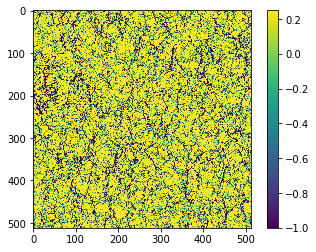

NameError: name 'flux_red_rec' is not defined

In [22]:
imshow(flux_red[0],vmin=-1,vmax=0.25)
colorbar()
show()
imshow(flux_red_rec[0],vmin=-1,vmax=0.25)
colorbar()
